# Tensile test workflow

Here, an examplary workflow of a tensile test is presented.
- The data source is obtained from a triple store via sparql queries.
- Then the elastic modulus is calculcated based on the given stress-strain data.
- The calculated elastic modulus is returned to the triple store.


### Importing and defining project from the custom defined module 

In [1]:
from pyiron_tensile_test import Project

In [2]:
pr = Project('test_tensile_job')
pr.remove_jobs(silently=True)

  0%|          | 0/1 [00:00<?, ?it/s]

### Creating a job of type tensile test

In [3]:
job = pr.create.job.TensileJob(job_name='tensile_job')

### Defining the sparql endpoint and query for data source

In [4]:
job.endpoint = 'http://localhost:8000/api/jena/S355/sparql'

In [5]:
download_url = job.query_data_source(test_name='Zx1')
download_url

'http://microservice_dbdocker:27777/api/S355_SteelSheet/S355_n2c.ipynb/804a2653db074a088c97832f'

In [6]:
download_url = download_url.replace("microservice_dbdocker", "127.0.0.1")

### Obtaining the experimental dataset

In [7]:
job.get_dataset(url=download_url)

In [8]:
job.experimental_json

,Data Resource,Object,Tensile Test,dataseries
has data resource location,http://microservice_dbdocker:27777/api/S355_SteelSheet/S355_n2c.ipynb/804a2653db074a088c97832f,NaN,NaN,NaN
hasIdentifier,dataresource_canon,obj,NaN,NaN
supplied object identifier,NaN,Zx1,NaN,NaN
Material,NaN,NaN,S355,NaN
executed by,NaN,NaN,"[J. , M. (S., J.)]",NaN
has data resource,NaN,NaN,"[{'Data Resource': {'has data resource location': 'http://microservice_dbdocker:27777/api/S355_SteelSheet/S355_r2n.ipynb/0c7e18fcc77d44b68043bb6d', 'hasIdentifier': 'dataresource_native'}}, {'Data...",NaN
has generated object identifier,NaN,NaN,Zx1,NaN
has measured maximum force,NaN,NaN,"{'unit': 'Kilonewton', 'value': 62.006923703333335}",NaN
has measured modulus of elasticity,NaN,NaN,"{'unit': 'Gigapascal', 'value': 194}",NaN
has measured original diameter,NaN,NaN,"{'unit': 'Millimetre', 'value': 5.992}",NaN


### Extracting stress and strain data from the dataset

In [9]:
job.extract_stress_strain()

In [10]:
stresses = job.input.stresses.copy()
strains = job.input.strains.copy()

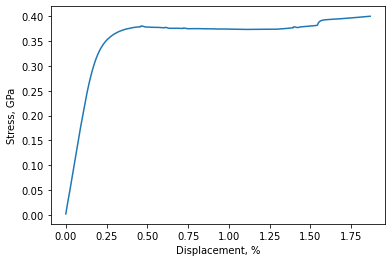

In [11]:
job.plot_stress_strain()

## Calculating the elastic modulus

In [12]:
job.run()

The job tensile_job was saved and received the ID: 5


In [13]:
job.output.elastic_modulus

181.58485412597656

### Return the calculated value to the triple store

In [14]:
job.update_triple_store(test_name='Zx1')

In [15]:
results = job.verify_update()

{'head': {'vars': ['tt', 'o']}, 'results': {'bindings': [{'tt': {'type': 'uri', 'value': 'https://material-digital.de/entity/e3f8b96eb74a4d799e2f5ae4e5e1c8f8'}, 'o': {'type': 'uri', 'value': 'https://material-digital.de/entity/6a006bea3b9e4054bcc36d9410f44296'}}]}}


## Verifying the hdf5 file storage

In [16]:
job_load = pr.load(job.name)

In [17]:
job_load.output

DataContainer({'elastic_modulus': 181.58485412597656})

In [18]:
job_load.input

DataContainer({'test_name': 'Zx1', 'strains': array([0.00000e+00, 4.00000e-05, 1.10000e-04, 5.00000e-04, 9.20000e-04,
       1.46000e-03, 1.98000e-03, 2.45000e-03, 2.80000e-03, 2.97000e-03,
       3.14000e-03, 3.56000e-03, 3.93000e-03, 4.34000e-03, 4.72000e-03,
       5.20000e-03, 5.60000e-03, 6.03000e-03, 6.47000e-03, 6.83000e-03,
       7.31000e-03, 7.73000e-03, 8.15000e-03, 8.59000e-03, 9.00000e-03,
       9.43000e-03, 9.87000e-03, 1.03200e-02, 1.08000e-02, 1.12800e-02,
       1.17500e-02, 1.21800e-02, 1.27200e-02, 1.31900e-02, 1.36400e-02,
       1.41300e-02, 1.46000e-02, 1.50700e-02, 1.55200e-02, 1.60000e-02,
       1.64500e-02, 1.69100e-02, 1.73600e-02, 1.78800e-02, 1.83200e-02,
       1.87600e-02, 1.92200e-02, 1.96800e-02, 2.01600e-02, 2.06800e-02,
       2.11700e-02, 2.16700e-02, 2.21000e-02, 2.25200e-02, 2.30200e-02,
       2.34600e-02, 2.38900e-02, 2.43900e-02, 2.48900e-02, 2.53600e-02,
       2.57800e-02, 2.62400e-02, 2.66800e-02, 2.71400e-02, 2.76000e-02,
       2.80200e-02, 2.84600e-02, 2.88700e-02, 2.92900e-02, 2.97900e-02,
       3.02600e-02, 3.07200e-02, 3.12100e-02, 3.17000e-02, 3.21400e-02,
       3.25700e-02, 3.30100e-02, 3.34600e-02, 3.38900e-02, 3.42900e-02,
       3.47400e-02, 3.51800e-02, 3.56100e-02, 3.60700e-02, 3.65000e-02,
       3.69400e-02, 3.73800e-02, 3.78100e-02, 3.82700e-02, 3.87300e-02,
       3.91800e-02, 3.96800e-02, 4.01500e-02, 4.06100e-02, 4.10800e-02,
       4.15200e-02, 4.19500e-02, 4.24100e-02, 4.28600e-02, 4.33200e-02,
       4.37300e-02, 4.41800e-02, 4.46400e-02, 4.50700e-02, 4.55100e-02,
       4.59400e-02, 4.63800e-02, 4.68200e-02, 4.72600e-02, 4.76800e-02,
       4.80900e-02, 4.85500e-02, 4.89800e-02, 4.94100e-02, 4.98600e-02,
       5.02700e-02, 5.06800e-02, 5.11400e-02, 5.16300e-02, 5.20800e-02,
       5.25100e-02, 5.29500e-02, 5.34200e-02, 5.39200e-02, 5.43600e-02,
       5.47900e-02, 5.52300e-02, 5.56700e-02, 5.60600e-02, 5.65000e-02,
       5.69700e-02, 5.74200e-02, 5.78600e-02, 5.83400e-02, 5.87900e-02,
       5.91900e-02, 5.96300e-02, 6.01100e-02, 6.05700e-02, 6.10400e-02,
       6.14900e-02, 6.19600e-02, 6.23700e-02, 6.28300e-02, 6.32900e-02,
       6.37600e-02, 6.42100e-02, 6.46900e-02, 6.51800e-02, 6.56400e-02,
       6.60900e-02, 6.65800e-02, 6.70500e-02, 6.74800e-02, 6.79100e-02,
       6.84100e-02, 6.88900e-02, 6.93500e-02, 6.97900e-02, 7.02500e-02,
       7.06700e-02, 7.11500e-02, 7.16400e-02, 7.21000e-02, 7.25700e-02,
       7.30300e-02, 7.35000e-02, 7.39500e-02, 7.44100e-02, 7.48900e-02,
       7.53500e-02, 7.57800e-02, 7.62500e-02, 7.66800e-02, 7.71500e-02,
       7.76300e-02, 7.80900e-02, 7.85700e-02, 7.90300e-02, 7.94600e-02,
       7.99000e-02, 8.04200e-02, 8.09200e-02, 8.13500e-02, 8.18500e-02,
       8.23000e-02, 8.28000e-02, 8.32900e-02, 8.37800e-02, 8.42300e-02,
       8.46900e-02, 8.51900e-02, 8.56100e-02, 8.60600e-02, 8.65500e-02,
       8.70400e-02, 8.75200e-02, 8.79400e-02, 8.83600e-02, 8.87900e-02,
       8.92500e-02, 8.96900e-02, 9.01700e-02, 9.06200e-02, 9.10900e-02,
       9.15300e-02, 9.19600e-02, 9.24500e-02, 9.29300e-02, 9.33800e-02,
       9.39100e-02, 9.43900e-02, 9.48300e-02, 9.52800e-02, 9.57200e-02,
       9.61400e-02, 9.65800e-02, 9.70300e-02, 9.75400e-02, 9.79800e-02,
       9.84400e-02, 9.88800e-02, 9.93300e-02, 9.97900e-02, 1.00270e-01,
       1.00730e-01, 1.01190e-01, 1.01670e-01, 1.02160e-01, 1.02620e-01,
       1.03090e-01, 1.03550e-01, 1.03990e-01, 1.04490e-01, 1.04960e-01,
       1.05420e-01, 1.05890e-01, 1.06340e-01, 1.06800e-01, 1.07290e-01,
       1.07760e-01, 1.08230e-01, 1.08690e-01, 1.09160e-01, 1.09610e-01,
       1.10090e-01, 1.10580e-01, 1.11100e-01, 1.11560e-01, 1.12010e-01,
       1.12510e-01, 1.13050e-01, 1.13550e-01, 1.14010e-01, 1.14460e-01,
       1.14940e-01, 1.15460e-01, 1.15940e-01, 1.16420e-01, 1.16920e-01,
       1.17470e-01, 1.17950e-01, 1.18460e-01, 1.18960e-01, 1.19440e-01,
       1.19900e-01, 1.20420e-01, 1.20990e-01, 1.21520e-01, 1.22070e-01,
       1.22630e-01, 1.23180e-01, 1.23730e-01, 1.24290e-01, 1.24830